In [4]:
using Controlz # this *might* take a few min to compile
using PyPlot # for plotting via matplotlib
using Printf

# (optional) hipster plot theme
PyPlot.matplotlib.style.use(normpath(joinpath(pathof(Controlz), "..", "hipster.mplstyle")))

# second order (SO) transfer functions

a second order transfer function $G(s)$ relating an input $u$ to an output $y$ takes the form:
\begin{equation}
    G(s)= \frac{Y^*(s)}{U^*(s)} = \frac{K}{\tau^2 s^2 + 2\tau \xi s + 1}
\end{equation}

<img src="https://raw.githubusercontent.com/SimonEnsemble/control_theory_demos/master/studios/so_system.png" width=500>

see [docs](https://simonensemble.github.io/Controlz.jl/dev/tfs/#(0,-2)-order-transfer-functions-1) for handy functions in `Controlz.jl` for handling second-order transfer functions.

in this studio, we'll compare two pairs of second-order transfer functions. credit to Trevor Carlisle for developing this studio.

## juxtaposing $G_1(s)$ and $G_2(s)$

let's juxtapose the following two second-order transfer functions:

\begin{equation}
    G_1(s)=\frac{4}{80 s ^ 2 + 10s + 5}
\end{equation}

\begin{equation}
    G_2(s)=\frac{4}{80 s ^ 2 + 40s + 5}
\end{equation}

for each transfer function, *without using `Controlz.jl`*, find the:
* gain $K$
* time constant $\tau$
* damping coefficient $\xi$
* poles $p_+$, $p_-$

(okay to use Julia for calculations but write it out by hand)

now, use `Controlz.jl` to corroborate (or revise!) your answers above:
* construct the transfer functions and assign them as variables `g₁` and `g₂`
* compute the zeros, poles, and gain with `zeros_poles_gain`. see [docs](https://simonensemble.github.io/Controlz.jl/dev/tfs/#poles,-zeros,-and-zero-frequency-gain-of-a-transfer-function-1).
* compute the time constant $\tau$ and damping coefficient $\xi$ using `time_constant` and`damping_coefficient`. see [docs](https://simonensemble.github.io/Controlz.jl/dev/tfs/#(0,-2)-order-transfer-functions-1).
* visualize the poles in the complex plane using `viz_poles_and_zeros`. see [docs](https://simonensemble.github.io/Controlz.jl/dev/viz/#poles-and-zeros-of-a-transfer-function-1). 

In [5]:
# construct transfer functions
g₁ = 4 / (80 * s ^ 2 + 10 * s + 5)
g₂ = 4 / (80 * s ^ 2 + 40 * s + 5)
@show g₁
@show g₂;

g₁ = 
          4.0
-----------------------
80.0*s^2 + 10.0*s + 5.0
g₂ = 
          4.0
-----------------------
80.0*s^2 + 40.0*s + 5.0


In [6]:
# compute the zeros, poles, and gain
z₁, p₁, k₁ = zeros_poles_gain(g₁)
@show k₁
@show p₁

z₂, p₂, k₂ = zeros_poles_gain(g₂)
@show k₂
@show p₂;

k₁ = 0.8
p₁ = Complex{Float64}[-0.06249999999999999 - 0.24206145913796356im, -0.06249999999999999 + 0.24206145913796356im]
k₂ = 0.8
p₂ = [-0.25, -0.25]


In [7]:
# compute τ and ξ for each transfer function
τ₁ = time_constant(g₁)
ξ₁ = damping_coefficient(g₁)
@show τ₁, ξ₁

τ₂ = time_constant(g₂)
ξ₂ = damping_coefficient(g₂)
@show τ₂, ξ₂

(τ₁, ξ₁) = (4.0, 0.25)
(τ₂, ξ₂) = (4.0, 1.0)


(4.0, 1.0)

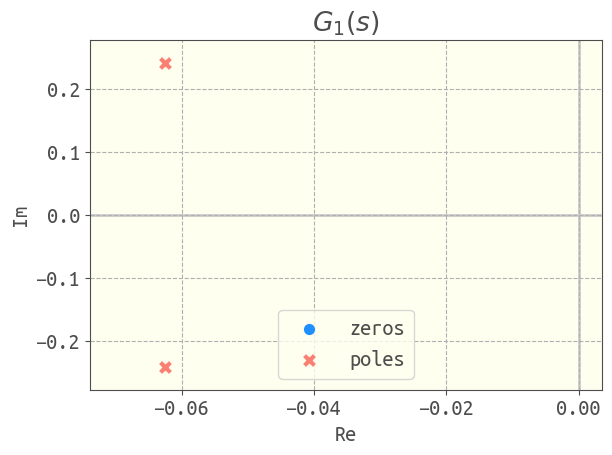

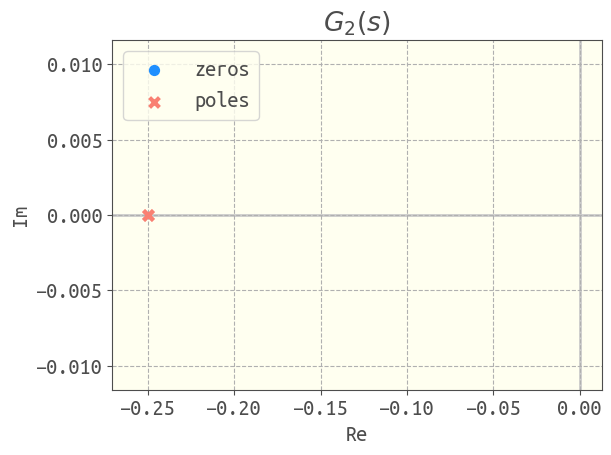

PyObject Text(0.5, 1, '$G_2(s)$')

In [8]:
# viz the poles and zeros (well, there shouldn't be any zeros, right?)
viz_poles_and_zeros(g₁)
title(L"$G_1(s)$")

viz_poles_and_zeros(g₂)
title(L"$G_2(s)$")

is $G_1$ overdamped, critically damped, or underdamped? Based on this, do you expect the response to a step input to oscillate? Based on the pole plot, do you expect the response to a step input to oscillate?

undamped ($0<\xi<1$), thus I expect oscillations.
the poles have imaginary parts that are nonzero, thus I expect oscillations on this basis as well.

is $G_2$ overdamped, critically damped, or underdamped? Based on this, do you expect the response to a step input to oscillate? Based on the pole plot, do you expect the response to a step input to oscillate?

critically damped ($xi=1$), thus I don't expect to see oscillations. the poles are real, so I don't expect to see oscillations.

for both $G_1(s)$ and $G_2(s)$, use `Controlz.jl` to simulate the response to a unit step input for $t \in [0, 80]$. see [docs](https://simonensemble.github.io/Controlz.jl/dev/sim/#response-of-an-underdamped-second-order-system-to-a-unit-step-input-1). plot *both* reponses on the same plot. to do this, don't use `viz_response`, but rather make your own line plots by:

```julia
figure()
plot(t₁, y₁, color="C0", label="first plot") # use first color in color cycle
plot(t₂, y₂, color="C1", label="second plot") # use second color in color cycle
xlabel("my xlabel")
ylabel("my ylabel")
title("go beavs!")
legend()
```

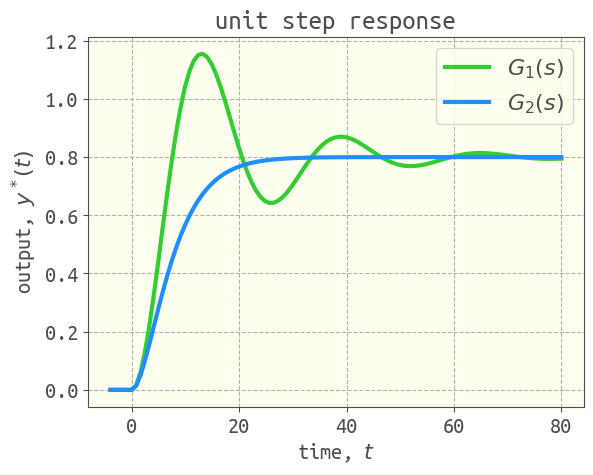

PyObject <matplotlib.legend.Legend object at 0x7fb4f1df1e10>

In [9]:
t₁, y₁ = simulate(g₁ / s, 80.0)
t₂, y₂ = simulate(g₂ / s, 80.0)

figure()
plot(t₁, y₁, color="C0", label=L"$G_1(s)$") # use first color in color cycle
plot(t₂, y₂, color="C1", label=L"$G_2(s)$") # use second color in color cycle
xlabel(L"time, $t$")
ylabel(L"output, $y^*(t)$")
title("unit step response")
legend()

regarding the presence/absence of oscillations in the response, does the simulation conform to your expectations you wrote above?

mhm.

which process, $G_1(s)$ or $G_2(s)$, has a faster response? here, the "faster" response is defined as the one whose output first reaches the new state, as opposed to settling at the new steady state.

$G_1(s)$

## juxtaposing $G_3(s)$ and $G_4(s)$

let's juxtapose the following two second-order transfer functions:

\begin{equation}
    G_3(s)=\frac{5}{64 s ^ 2 + 64s + 4}
\end{equation}

\begin{equation}
    G_4(s)=\frac{5}{4 s ^ 2 + 24s + 4}
\end{equation}

for each transfer function, use `Controlz.jl` to:
* construct the transfer functions and assign them as variables `g₃` and `g₄`
* compute the zeros, poles, and gain with `zeros_poles_gain`. see [docs](https://simonensemble.github.io/Controlz.jl/dev/tfs/#poles,-zeros,-and-zero-frequency-gain-of-a-transfer-function-1).
* compute the time constant $\tau$ and damping coefficient $\xi$ using `time_constant` and`damping_coefficient`. see [docs](https://simonensemble.github.io/Controlz.jl/dev/tfs/#(0,-2)-order-transfer-functions-1).
* visualize the poles in the complex plane using `viz_poles_and_zeros`. see [docs](https://simonensemble.github.io/Controlz.jl/dev/viz/#poles-and-zeros-of-a-transfer-function-1). 

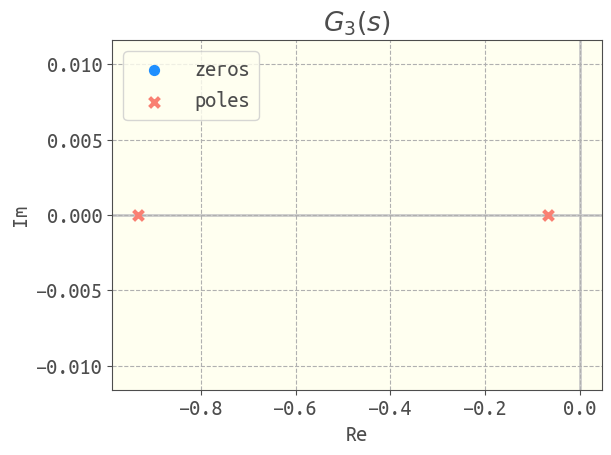

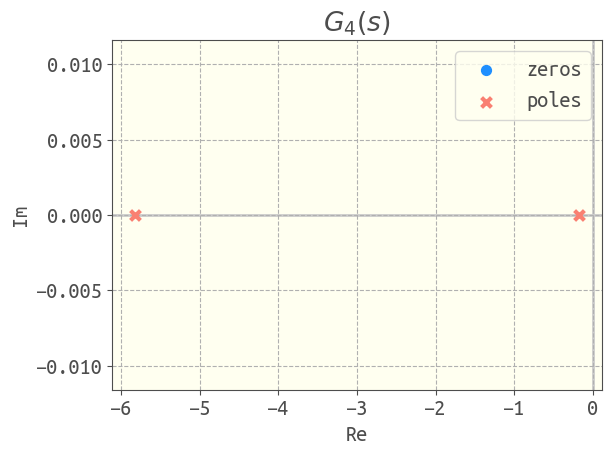

g₃ = 
          5.0
-----------------------
64.0*s^2 + 64.0*s + 4.0
g₄ = 
         5.0
----------------------
4.0*s^2 + 24.0*s + 4.0
k₃ = 1.25
p₃ = [-0.9330127018922193, -0.06698729810778067]
k₄ = 1.25
p₄ = [-5.82842712474619, -0.1715728752538099]
(τ₃, ξ₃) = (4.0, 2.0)
(τ₄, ξ₄) = (1.0, 3.0)


PyObject Text(0.5, 1, '$G_4(s)$')

In [10]:
# construct transfer functions
g₃ = 5 / (64 * s ^ 2 + 64 * s + 4)
g₄ = 5 / (4 * s ^ 2 + 24 * s + 4)
@show g₃
@show g₄;

# compute the zeros, poles, and gain
z₃, p₃, k₃ = zeros_poles_gain(g₃)
@show k₃
@show p₃

z₄, p₄, k₄ = zeros_poles_gain(g₄)
@show k₄
@show p₄

# compute τ and ξ for each transfer function
τ₃ = time_constant(g₃)
ξ₃ = damping_coefficient(g₃)
@show τ₃, ξ₃

τ₄ = time_constant(g₄)
ξ₄ = damping_coefficient(g₄)
@show τ₄, ξ₄

# viz the poles and zeros (well, there shouldn't be any zeros, right?)
viz_poles_and_zeros(g₃)
title(L"$G_3(s)$")

viz_poles_and_zeros(g₄)
title(L"$G_4(s)$")

are the transfer functions overdamped, underdamped, or critically damped? Based on this, do you expect to see oscillations in the responses to a step input?

both are overdamped ($\xi > 1$)

can you predict which transfer function has a faster response? since *both* $\tau$ and $\xi$ affect the speed of the response and the $\tau$'s and $\xi$'s for the two processes suggest two opposite conclusions, it's difficult for me to tell.

based on a comparison of $\tau$'s, what do you expect? $\tau_3>\tau_4$ so I expect based on the $\tau$ only maybe process 4 will be faster.

based on a comparison of $\xi$'s, what do you expect? $\xi_3<\xi_4$ so I expect based on the $\xi$ only maybe process 3 will be faster (think water vs. syrup).

[you should be hesitant to boldly draw a conclusion to the first question...]

for both $G_3(s)$ and $G_4(s)$, use `Controlz.jl` to simulate the response to a unit step input for $t \in [0, 80]$. see [docs](https://simonensemble.github.io/Controlz.jl/dev/sim/#response-of-an-underdamped-second-order-system-to-a-unit-step-input-1). plot *both* reponses on the same plot.

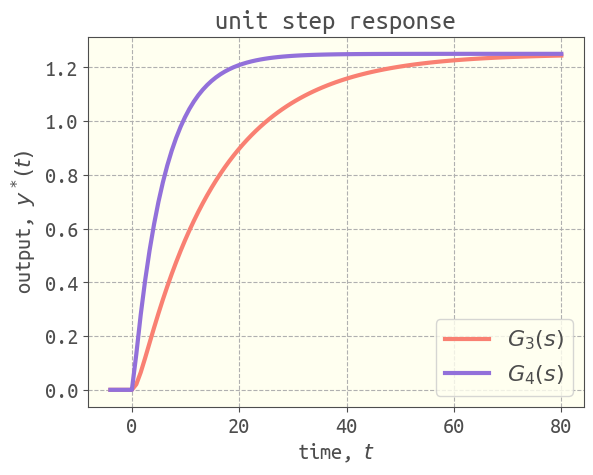

PyObject <matplotlib.legend.Legend object at 0x7fb4f561a5c0>

In [13]:
t₃, y₃ = simulate(g₃ / s, 80.0)
t₄, y₄ = simulate(g₄ / s, 80.0)

figure()
plot(t₃, y₃, color="C2", label=L"$G_3(s)$") # use first color in color cycle
plot(t₄, y₄, color="C3", label=L"$G_4(s)$") # use second color in color cycle
xlabel(L"time, $t$")
ylabel(L"output, $y^*(t)$")
title("unit step response")
legend()

are there oscillations in the responses? justify based on the pole plot.

no, which makes sense b/c the poles are real-- they have zero imaginary parts.

which process has the faster response? can you justify this by looking at the poles?

process four is faster. since the response is a sum of two response modes, this is not too surprising from the pole plot because process three has a pole close to the imaginary axis. this response mode is going to decay very slowly. thus from the pole plot I can tell that the slow response mode is going to make process three slower than process four.

**ambitious Beavers only:** write a `for` loop to simulate the unit step response to 

\begin{equation}
    G(s)=\frac{4}{80 s ^ 2 + 40\xi s + 5}
\end{equation}

for $\xi = [0.2, 0.4, 0.6, 0.8, 1.0]$ and plot the responses on the same plot. do not copy and paste code; use a for loop over $\xi$'s for constructing the transfer function, simulating the response for $t\in[0,80]$, and plotting the curves. use a legend to label which $\xi$ each output response curve corresponds to.

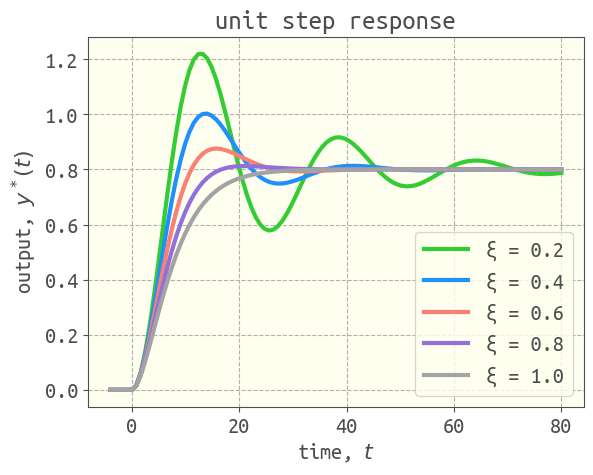

PyObject <matplotlib.legend.Legend object at 0x7fb4f72dc7b8>

In [14]:
figure()
for ξ in range(0.2, 1.0, length=5)
    g = 4 / (80 * s ^ 2 + 40 * ξ * s + 5)
    t, y = simulate(g / s, 80.0)
    plot(t, y, label="ξ = $ξ")
end
xlabel(L"time, $t$")
ylabel(L"output, $y^*(t)$")
title("unit step response")
legend()